In [1]:
import sys
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator 
from qiskit.utils import QuantumInstance
from qubap.qiskit.mariana.local_global_costfunc import global_observable, local_observable, ansatz_numerical
from qubap.qiskit.luciano.costfunc_barren_plateaus import VQE_shift 
from qubap.qiskit.luciano.variational_algorithms import VQE, energy_evaluation

import qiskit.opflow as of

In [10]:
n_qbitsB = 10
n_total = n_qbitsB + 1
num_iters = 300
layers =2
n_params = 2*n_qbitsB*layers + n_total

In [11]:
H_global = global_observable(n_qbitsB)
H_local = local_observable(n_qbitsB)
quantum_instance = QuantumInstance(AerSimulator() , shots = 2**5 )
ansatz = ansatz_numerical(n_qbitsB, layers=layers)
npars = ansatz.num_parameters # number of parameters given the variational ansatz
pars  = np.random.randn( npars ) * np.pi

In [34]:
for i in range(10):
    results_global = VQE( H_global, ansatz, pars, num_iters, quantum_instance )
    data_global    = [ energy_evaluation(H_global, ansatz, x, AerSimulator(method='statevector') ) for x in results_global["x"] ]
    results_shift = VQE_shift(H_global, ansatz, pars, num_iters, num_iters//3, quantum_instance ) 
    data_shift    = [ energy_evaluation(H_global, ansatz, x, AerSimulator(method='statevector') ) for x in results_shift] 
    np.save("Data_10qbtsB_300Iter_mean"+str(i),[data_global,data_shift])
    

In [29]:
# We save the data
np.save("Data_10qbtsB_300Iter",[data_global,data_shift])

(2, 300)

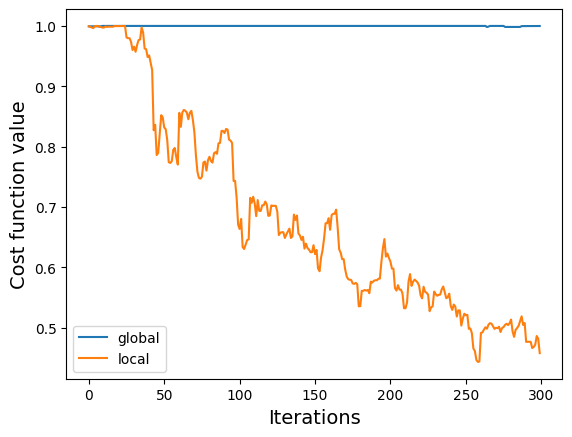

In [30]:
plt.plot( data_global )
plt.plot( data_shift  )
plt.legend(['global','local'])
plt.xlabel("Iterations",size=14)
plt.ylabel("Cost function value", size=14)
plt.savefig("Data_10qbtsB_300Iter.pdf")